<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/8%7C%7C_Decesion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [13]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [14]:
df= pd.DataFrame(data)

print("---------The Raw Dataset----------")
print(df.head())
print("\n")

---------The Raw Dataset----------
    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes




In [15]:
inputs = df.drop('PlayTennis', axis=1)
target = df['PlayTennis']

In [16]:
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
inputs['Outlook_n'] = le_outlook.fit_transform(inputs['Outlook'])
inputs['Temperature_n'] = le_temp.fit_transform(inputs['Temperature'])
inputs['Humidity_n'] = le_humidity.fit_transform(inputs['Humidity'])
inputs['Wind_n'] = le_wind.fit_transform(inputs['Wind'])

In [17]:
inputs_n = inputs.drop(['Outlook', 'Temperature', 'Humidity', 'Wind'], axis=1)

print("---------The Encoded Dataset----------")
print(inputs_n.head())

---------The Encoded Dataset----------
   Outlook_n  Temperature_n  Humidity_n  Wind_n
0          2              1           0       1
1          2              1           0       0
2          0              1           0       1
3          1              2           0       1
4          1              0           1       1


In [18]:
model= DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(inputs_n, target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

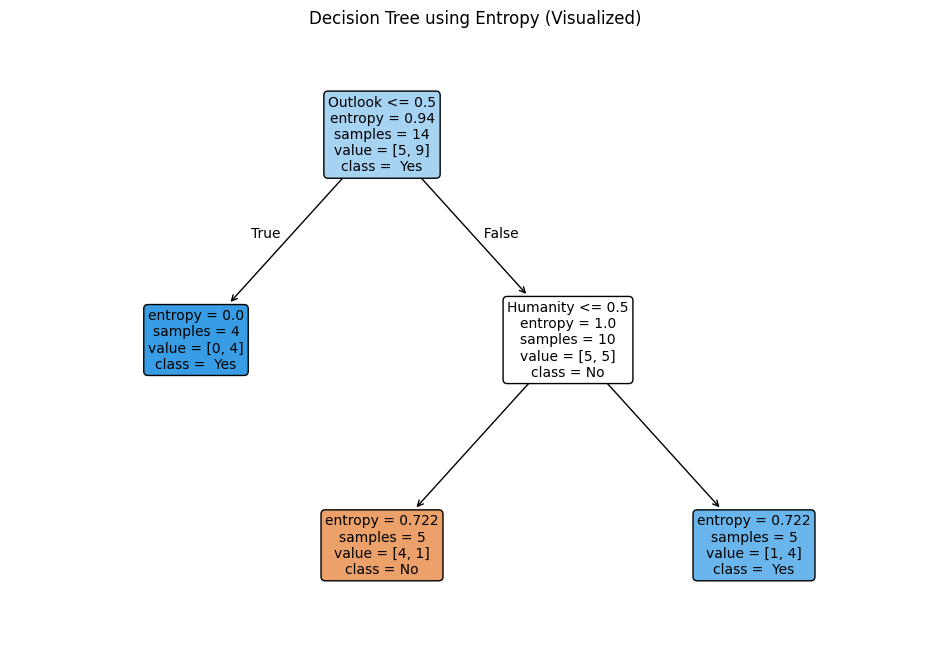

In [19]:
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=['Outlook', 'Temperature', 'Humanity', 'Wind'],
          class_names=['No',' Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree using Entropy (Visualized)")
plt.show()

In [20]:
#decision tree with cart algorithm using iris dataset

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

print("Iris dataset loaded. Features (X) and Target (y) are ready.")

Iris dataset loaded. Features (X) and Target (y) are ready.


In [23]:
print("---------Iris Features (first 5 rows)----------")
print(X[:5])
print("\n---------Iris Target (first 5 rows)----------")
print(y[:5])

---------Iris Features (first 5 rows)----------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

---------Iris Target (first 5 rows)----------
[0 0 0 0 0]


In [24]:
inputs = X
target = y
print("Inputs and target assigned for Iris dataset.")

Inputs and target assigned for Iris dataset.


In [25]:
# Label encoding is not required for the Iris dataset as its features are numerical.
# This cell previously performed label encoding for a categorical dataset.

In [26]:
# Displaying encoded dataset is not applicable here as Iris features are already numerical.
# This cell previously displayed a numerically encoded categorical dataset.
print("Iris features are already numerical; no encoding steps were performed.")
print("---------Iris Features----------")
print(inputs[:5])

Iris features are already numerical; no encoding steps were performed.
---------Iris Features----------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(inputs, target)

DecisionTreeClassifier(max_depth=3)

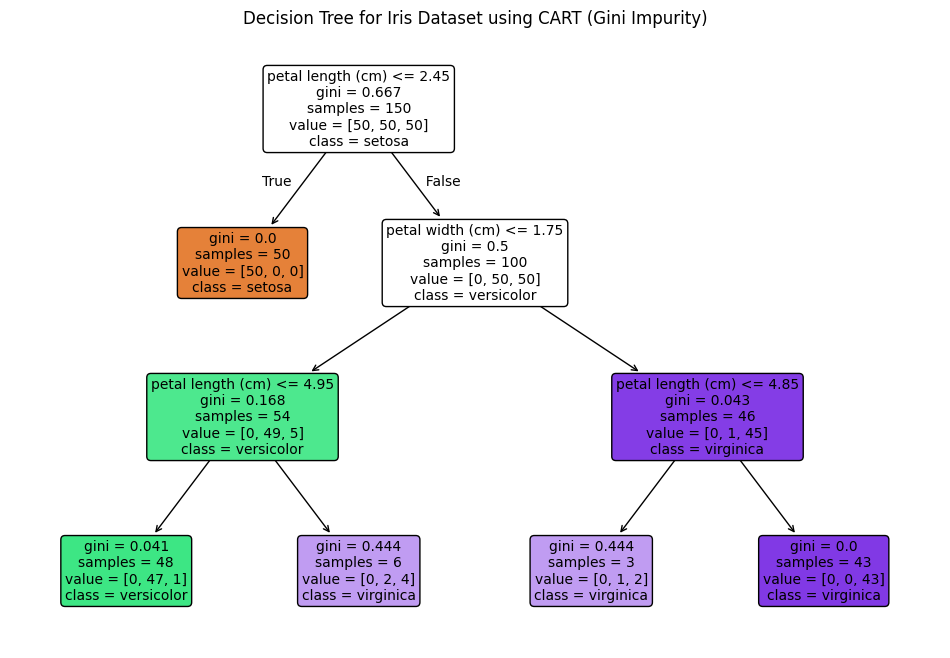

In [28]:
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names_iris,
          class_names=class_names_iris,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Iris Dataset using CART (Gini Impurity)")
plt.show()

In [29]:
#tree pruning
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
data= load_breast_cancer()
X,y =data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
clf= DecisionTreeClassifier(random_state=0)
path= clf.cost_complexity_pruning_path(X_train, y_train)  #path where model got complexed

In [32]:
ccp_alphas= path.ccp_alphas, path.impurities

print(f"Number of pontential alpha values: {len(ccp_alphas)}")
#print(training model with different alphas... (this mught take some time))

Number of pontential alpha values: 2


In [33]:
clfs= []
for ccp_alpha in ccp_alphas[0]:
    clf= DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [41]:
train_scores=[clf.score(X_train, y_train) for clf in clfs]
test_scores=[clf.score(X_test, y_test) for clf in clfs]

In [42]:
train_scores

[1.0,
 0.9976525821596244,
 0.9906103286384976,
 0.9882629107981221,
 0.9835680751173709,
 0.9788732394366197,
 0.9765258215962441,
 0.971830985915493,
 0.9647887323943662,
 0.9553990610328639,
 0.931924882629108]

In [43]:
test_scores

[0.8811188811188811,
 0.8881118881118881,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9230769230769231,
 0.9300699300699301,
 0.9300699300699301,
 0.9370629370629371,
 0.916083916083916,
 0.916083916083916]

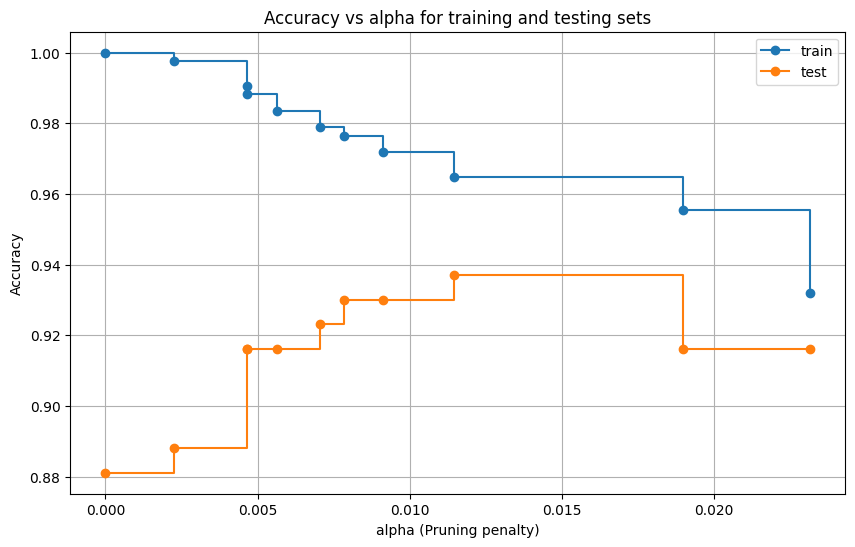

In [49]:
fig, ax= plt.subplots(figsize=(10,6))
ax.set_xlabel("alpha (Pruning penalty)")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

# Extract ccp_alpha values directly from the trained classifiers in 'clfs'
# This ensures the x-axis data matches the length of train_scores and test_scores
plot_ccp_alphas = [clf.ccp_alpha for clf in clfs]

ax.plot(plot_ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(plot_ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid(True)
plt.show()

In [47]:
best_index= test_scores.index(max(test_scores))
best_clf= clfs[best_index]

In [55]:
best_alpha = plot_ccp_alphas[best_index]
print(f"\n ---- results------")
print(f"Best alpha value: {best_alpha:.4f}")
print(f"Accuracy at this alpha: {test_scores[best_index]*100:.2f}%")


 ---- results------
Best alpha value: 0.0114
Accuracy at this alpha: 93.71%


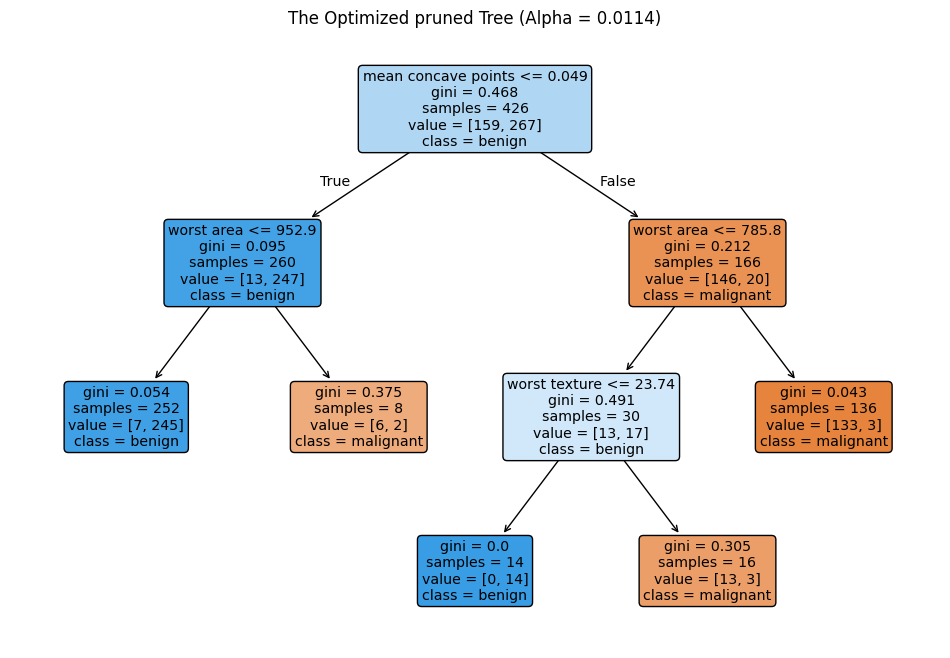

In [57]:
best_clf= DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, rounded=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title(f"The Optimized pruned Tree (Alpha = {best_alpha:.4f})")
plt.show()

In [58]:
#assignment: Customer Churn Prediction using Ensemble Models